In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [9]:
x_train = pd.read_csv("Train/X_Train.csv")
x_train.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [10]:
x_train.describe()

,f1,f2,f3
count,3000.000000,3000.000000,3000.000000
mean,0.007453,0.999286,0.029487
std,1.334138,1.023853,1.209558
min,-3.470773,-3.692615,-3.286481
25%,-1.045220,0.325665,-0.986959
50%,-0.144115,1.004693,0.225411
75%,1.052555,1.693354,1.041319
max,3.741376,4.185015,2.706148


In [11]:
x_train = x_train.values
x_train = (x_train - x_train.mean(axis=0))/x_train.std(axis=0)
x_train[:5, :]

array([[-0.93471307, -0.24439694, -0.46140414],
       [-0.7823013 , -0.19327286, -1.08586573],
       [-0.46707053,  0.56681072, -1.17534766],
       [ 0.99595846,  0.34128188,  1.16101187],
       [ 0.48839071,  0.29377517,  0.44826784]])

In [12]:
y_train = pd.read_csv("Train/Y_Train.csv")
y_train.head()

,label
0,1
1,1
2,1
3,0
4,0


In [13]:
y_train = y_train.values
y_train = y_train.reshape(-1, 1)

In [15]:
y_train[:5]

array([[1],
       [1],
       [1],
       [0],
       [0]])

#### Onto making a model

In [18]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

def error(X, Y, theta):
    
    hi = hypothesis(X, theta)
    total_error = (Y*np.log(hi)) + ((1-Y)*np.log(1-hi))
    return -1*np.mean(total_error)


In [25]:
def gradient(X, y, theta):

    hi = hypothesis(X, theta)
    grad = np.dot(X.T, y - hi)

    m = X.shape[0]
    return grad/m

def gradientDescent(X, y, lr = 0.2, max_steps = 500):

    error_list = []

    m,n = X.shape
    theta = np.zeros((n,1))

    for i in range(max_steps):
        err = error(X, y, theta)
        error_list.append(err)

        grad = gradient(X, y, theta)
        theta = theta + lr * grad

    return theta, error_list

#### Preparing the data

In [26]:
ones = np.ones((x_train.shape[0],1))
X_ = np.hstack((ones, x_train))

In [27]:
theta, error_list = gradientDescent(X_, y_train)

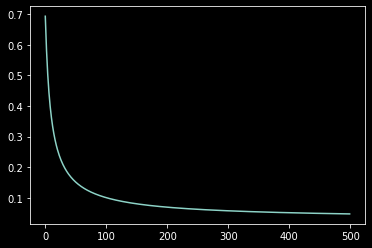

In [28]:
plt.plot(error_list)
plt.show()

We get error reducing nicely

In [29]:
def predict(X, theta):
    h = hypothesis(X, theta)
    output = np.zeros(h.shape)

    output[h >= 0.5] = 1

    return output

In [30]:
x_test = pd.read_csv("Test/X_Test.csv")
x_test.head()

,f1,f2,f3
0,-0.767508,-0.261859,-2.514831
1,-1.241653,1.449001,-0.413089
2,1.925270,1.931761,1.342619
3,-1.298255,1.049761,-0.527319
4,-0.964712,0.938088,-1.186328


In [32]:
x_test = x_test.values
x_test = (x_test - x_test.mean(axis=0))/x_test.std(axis=0)
x_test[:5, :]

array([[-0.57728341, -1.25801397, -2.13531524],
       [-0.9409651 ,  0.42552683, -0.35535257],
       [ 1.4881487 ,  0.90057735,  1.13155462],
       [-0.98438046,  0.03266184, -0.45209362],
       [-0.72854413, -0.07722764, -1.01020713]])

In [33]:
ones = np.ones((x_test.shape[0],1))
x_ = np.hstack((ones, x_test))

In [35]:
preds = predict(x_, theta)
preds[:5, :]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [36]:
df = pd.DataFrame(preds.astype("int"), columns=["label"])
df.head()

,label
0,1
1,1
2,0
3,1
4,1


In [37]:
df.to_csv("Output.csv", index=None)

We got a accuracy of $99\%$

#### Trying with SK Learn

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [42]:
predictions = model.predict(x_test)
predictions[:5]

array([1, 1, 0, 1, 1])

In [43]:
df2 = pd.DataFrame(predictions, columns=["label"])
df2.head()

,label
0,1
1,1
2,0
3,1
4,1


In [45]:
df2.to_csv("Output.csv", index=None)

We again get $99\%$